**The Decision Tree Algorithm is one of the most commonly used Algorithm for machine learning.**
- Today we will gain a better understanding using iris dataset.
- Decision Tree helps us to find out the best important features(columns) in our dataset (iris)

# IMPORT LIBRARIES AND INPUT THE DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('Iris.csv', index_col = 0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# BUILD THE MODEL

In [3]:
#Separate the target(dependent variable)Y and independent variables X
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [4]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [5]:
y.head()

Id
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
Name: Species, dtype: object

In [6]:
#Train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [7]:
#creating a function to obtain the classification report
def create_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test,y_pred))
    return model

# DECISION TREE CONSTRUCTION

In [8]:
#creating an object of Decision Tree
dt=DecisionTreeClassifier()

In [9]:
#classification report of model dt
create_model(dt)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
y_pred=dt.predict(x_test)

# VISUALIZING THE TREE

In [11]:
features=x.columns
features

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

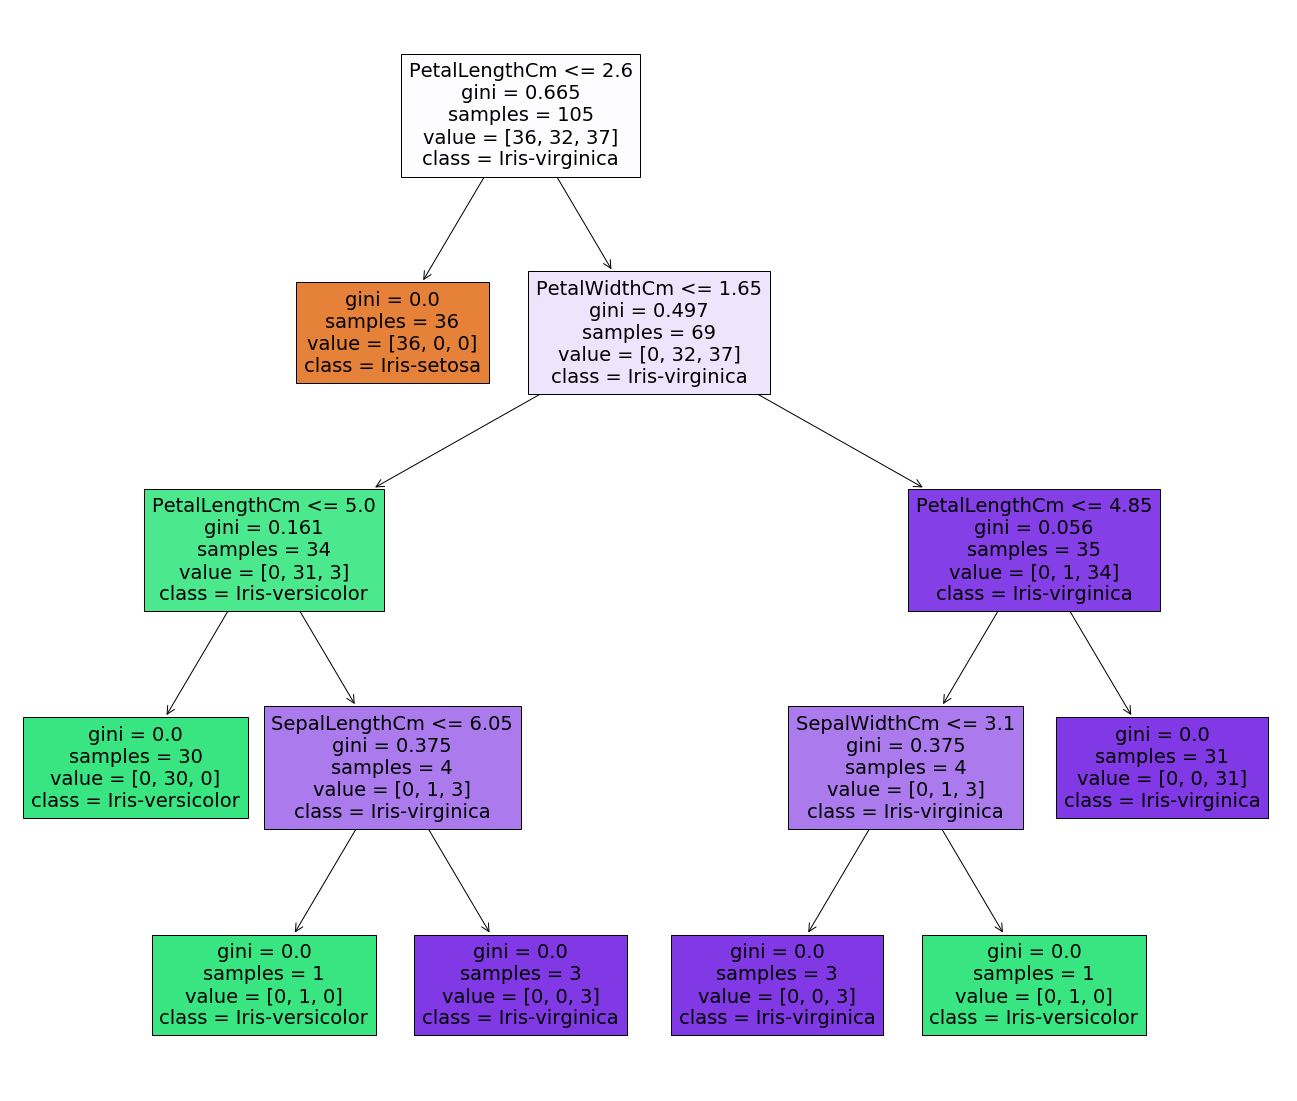

In [12]:
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt,feature_names=features,class_names=y.unique(),filled=True)          

# VISUALISING THE TREE IN TEXT FORMAT

In [13]:
text_representation=tree.export_text(dt)              #dt is object of DecisionTreeClassifier
print(text_representation)

|--- feature_2 <= 2.60
|   |--- class: Iris-setosa
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



# CONFUSION MATRIX

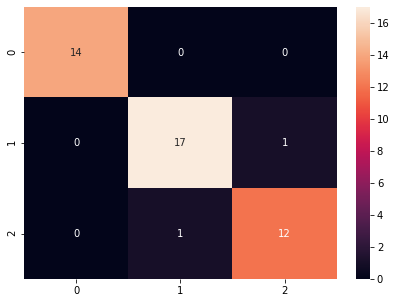

In [14]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)

**You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.**